# Linear Regression

## Imports, Configurations and Setup

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as matcol
import matplotlib.patches as patches
import seaborn as sb
            
# Configuration
%matplotlib inline
%config InlineBackend.figure_format='retina'
sb.set(style='ticks')

color_blue: #4c72b0
color_orange: #dd8452
color_green: #55a868
color_red: #c44e52
color_purple: #8172b3
color_brown: #937860
color_pink: #da8bc3
color_grey: #8c8c8c
color_yellow: #ccb974
color_aqua: #64b5cd


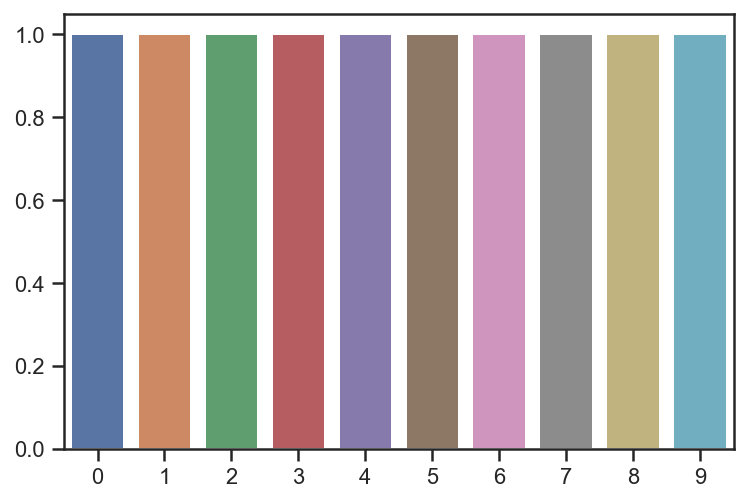

In [2]:
# Set color vars
color_blue = sb.color_palette(palette='deep')[0]
color_orange = sb.color_palette(palette='deep')[1]
color_green = sb.color_palette(palette='deep')[2]
color_red = sb.color_palette(palette='deep')[3]
color_purple = sb.color_palette(palette='deep')[4]
color_brown = sb.color_palette(palette='deep')[5]
color_pink = sb.color_palette(palette='deep')[6]
color_grey = sb.color_palette(palette='deep')[7]
color_yellow = sb.color_palette(palette='deep')[8]
color_aqua = sb.color_palette(palette='deep')[9]

print('color_blue: {}'.format(matcol.to_hex(color_blue)))
print('color_orange: {}'.format(matcol.to_hex(color_orange)))
print('color_green: {}'.format(matcol.to_hex(color_green)))
print('color_red: {}'.format(matcol.to_hex(color_red)))
print('color_purple: {}'.format(matcol.to_hex(color_purple)))
print('color_brown: {}'.format(matcol.to_hex(color_brown)))
print('color_pink: {}'.format(matcol.to_hex(color_pink)))
print('color_grey: {}'.format(matcol.to_hex(color_grey)))
print('color_yellow: {}'.format(matcol.to_hex(color_yellow)))
print('color_aqua: {}'.format(matcol.to_hex(color_aqua)))

sb.barplot(x=np.arange(0,10), y=[1] * 10, palette='deep');

## Overview

Linear regression is a form of supervised learning and falls in the category of regression models. This method is all about fitting a straight line to best fit a collection of numeric data points. It can be used in 2-dimensional space, 3-dimensional space and beyond (e.g. n-dimensional space).

The variable we are trying to predict is referred to as the **dependent variable** while the variables (or features) used to predict this variable are referred to as **independent variables** (or predictors).

```{Warning} 
**Linear Regression works best on linear data:** Linear regression fits a straight line, so if the relationship seen from the data points does not seem to be linear, it will likely not result in a good fit. In cases where the data is not linear adjustments need to be made, like: transforming the data to become linear, adding additional features or choosing a different model all together.
```

```{Warning} 
**Linear Regression is sensitive to outliers:** Linear regression tries to fit a line, considering all available points, so a few extreme outliers can have a big impact on the fit of the line.
```

### Simple Linear Regression

In it's simplest form, linear regression can be used with just one independent variable (predictor) to predict a dependent variable. This case is easy to visualize as we can easily plot the predicted relationship (the straight line we are trying to fit) in 2-dimensional space, in a common Cartesian coordinate plane (e.g x and y axes).

The formula which would describe the fitted line would be of the following format:

$\color{#c44e52}{y} = \color{#8172b3}{m}\color{#64b5cd}{x} + \color{#da8bc3}{b}$
- $\color{#64b5cd}{x}$ is the independent variable (predictor)
- $\color{#c44e52}{y}$ is the dependent variable
- $\color{#8172b3}{m}$ is the coefficient for $x$ (e.g. the slope of the line being fitted)
- $\color{#da8bc3}{b}$ is the intercept (e.g. the $y$ offset at $x=0$ of the line being fitted)


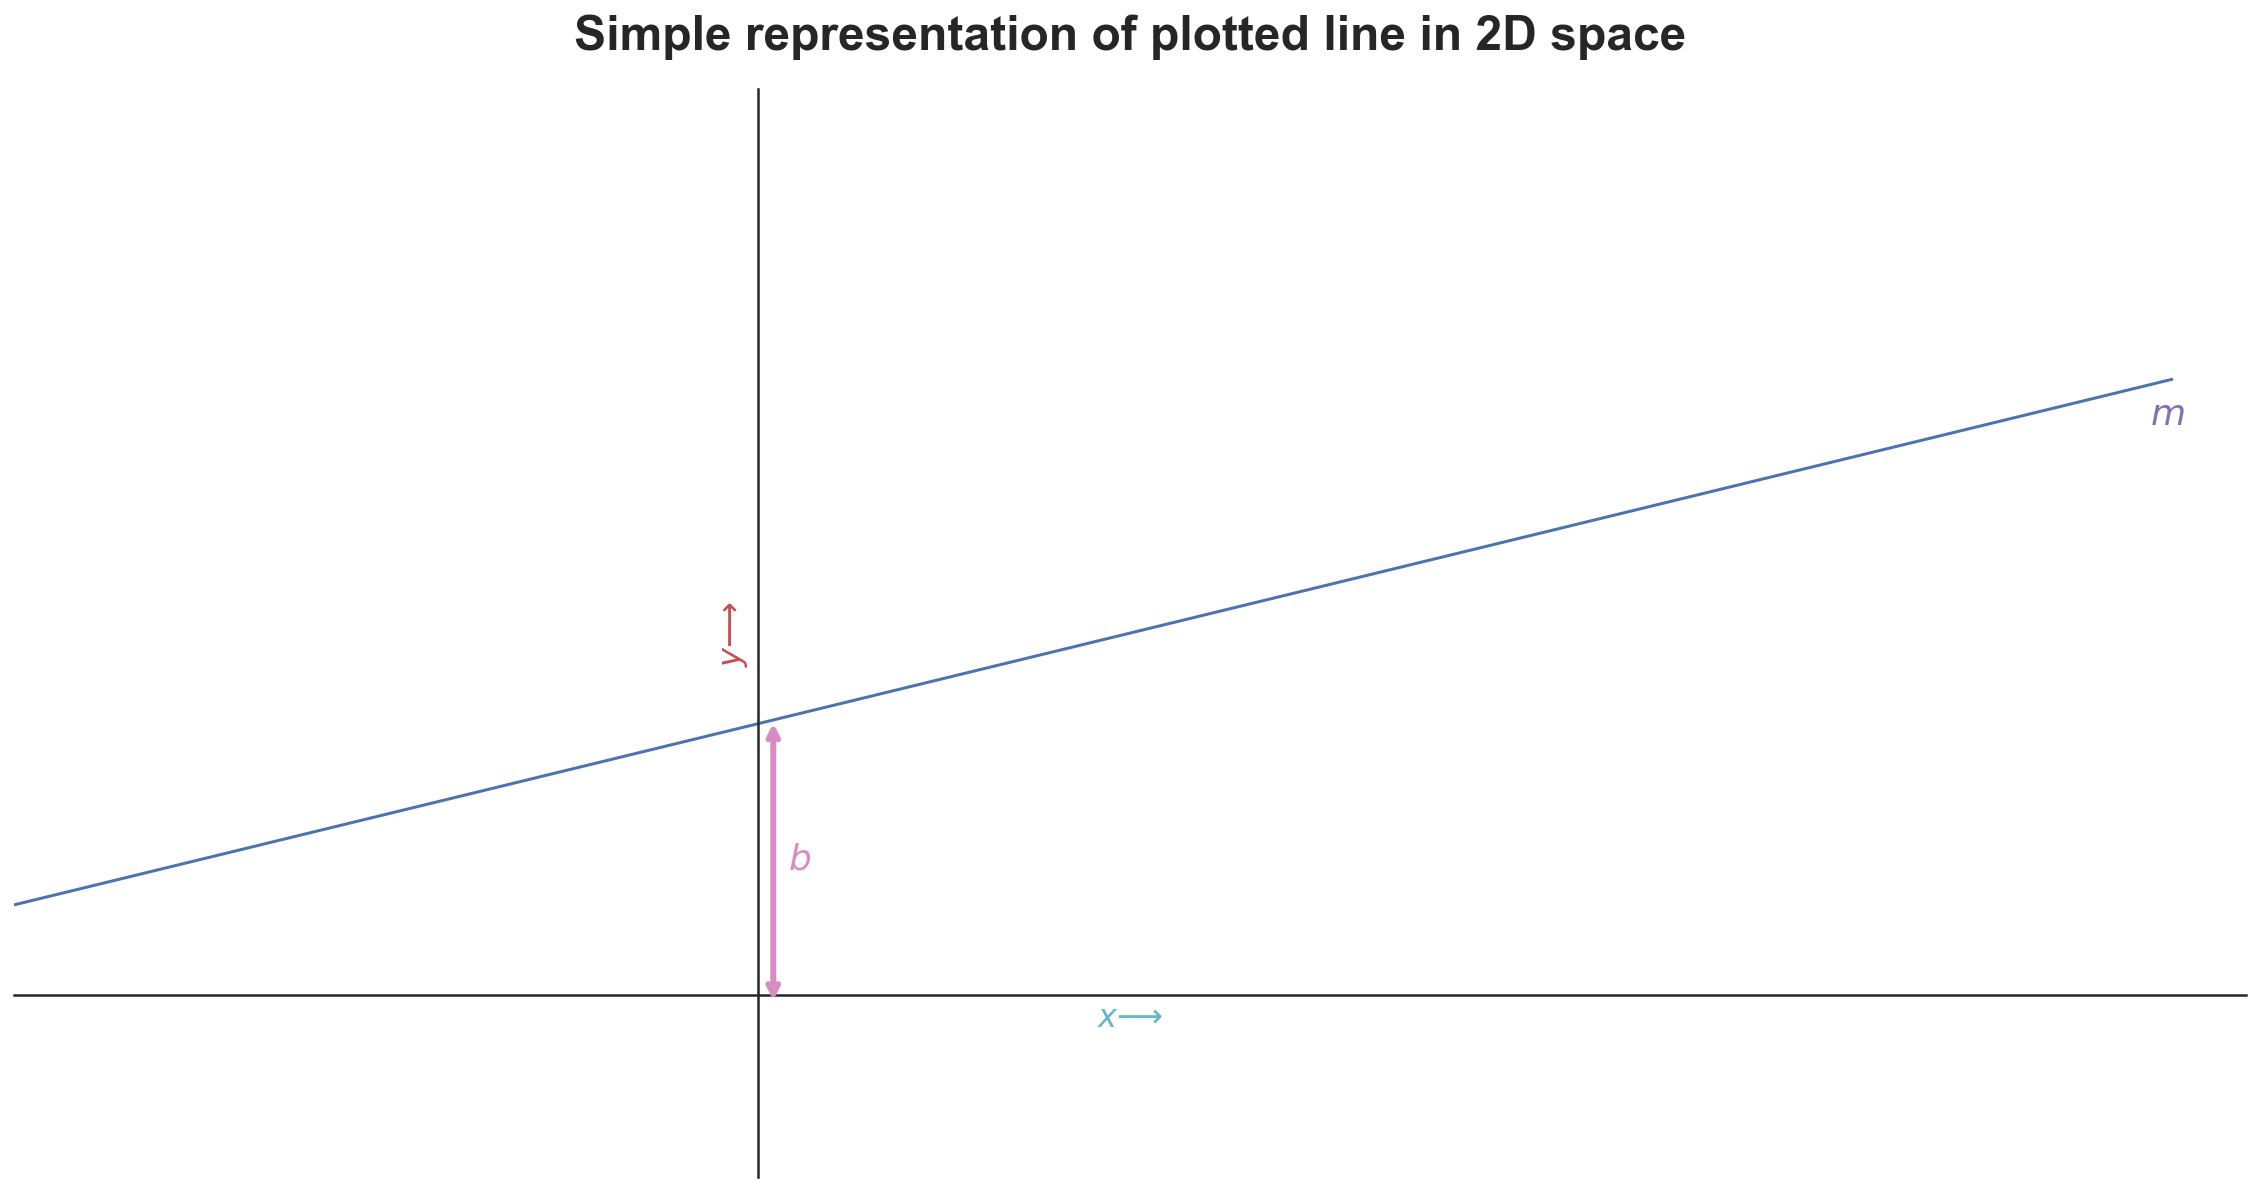

In [3]:
fig, ax = plt.subplots(figsize=(20,10))

m = 0.2  # slope
b = 3  # intercept

x = np.array(np.arange(-10,20))  
y = m * x + b

plt.plot(x, y)
plt.title('Simple representation of plotted line in 2D space', fontsize=24, fontweight='bold', pad=20)

# Draw m text
ax.text(18.7,6.3,'$m$', fontsize=18, fontweight='bold', color=color_purple)

# Draw b arrow and text
plt.annotate('', xy=(0.2,-0.1), xytext=(0.2,3.05), arrowprops=dict(arrowstyle='<->', color=color_pink, lw=3))
ax.text(0.4,1.4,'$b$', fontsize=18, fontweight='bold', color=color_pink)

# Set axes limits
ax.set_xlim(-10, 20)
ax.set_ylim(-2, 10)

# Set x and y labels
ax.set_xlabel('$x ⟶$', color=color_aqua, fontsize=16)
ax.set_ylabel('$y ⟶$', color=color_red, fontsize=16)

# Remove ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Set the x-spine
ax.spines['left'].set_position('zero')

# Turn off the right spine/ticks
ax.spines['right'].set_color('none')

# Set the y-spine
ax.spines['bottom'].set_position('zero')

# Turn off the top spine/ticks
ax.spines['top'].set_color('none');

#### Python Code Example

In [4]:
# Imports and data import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
training_data = pd.read_csv('data/bmi_and_life_expectancy.csv')
training_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [5]:
# Assign independent and dependent variables
X = training_data['BMI'].values.reshape(-1,1)  # reshape to -1 rows (e.g. any), 1 column
y = training_data['Life expectancy'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y);

# Predict life expectancy for a specific BMI value, using the fitted model
print(model.predict([[22]]))  # [[]] to enter parameter as array of arrays (matrix)

[62.634386]


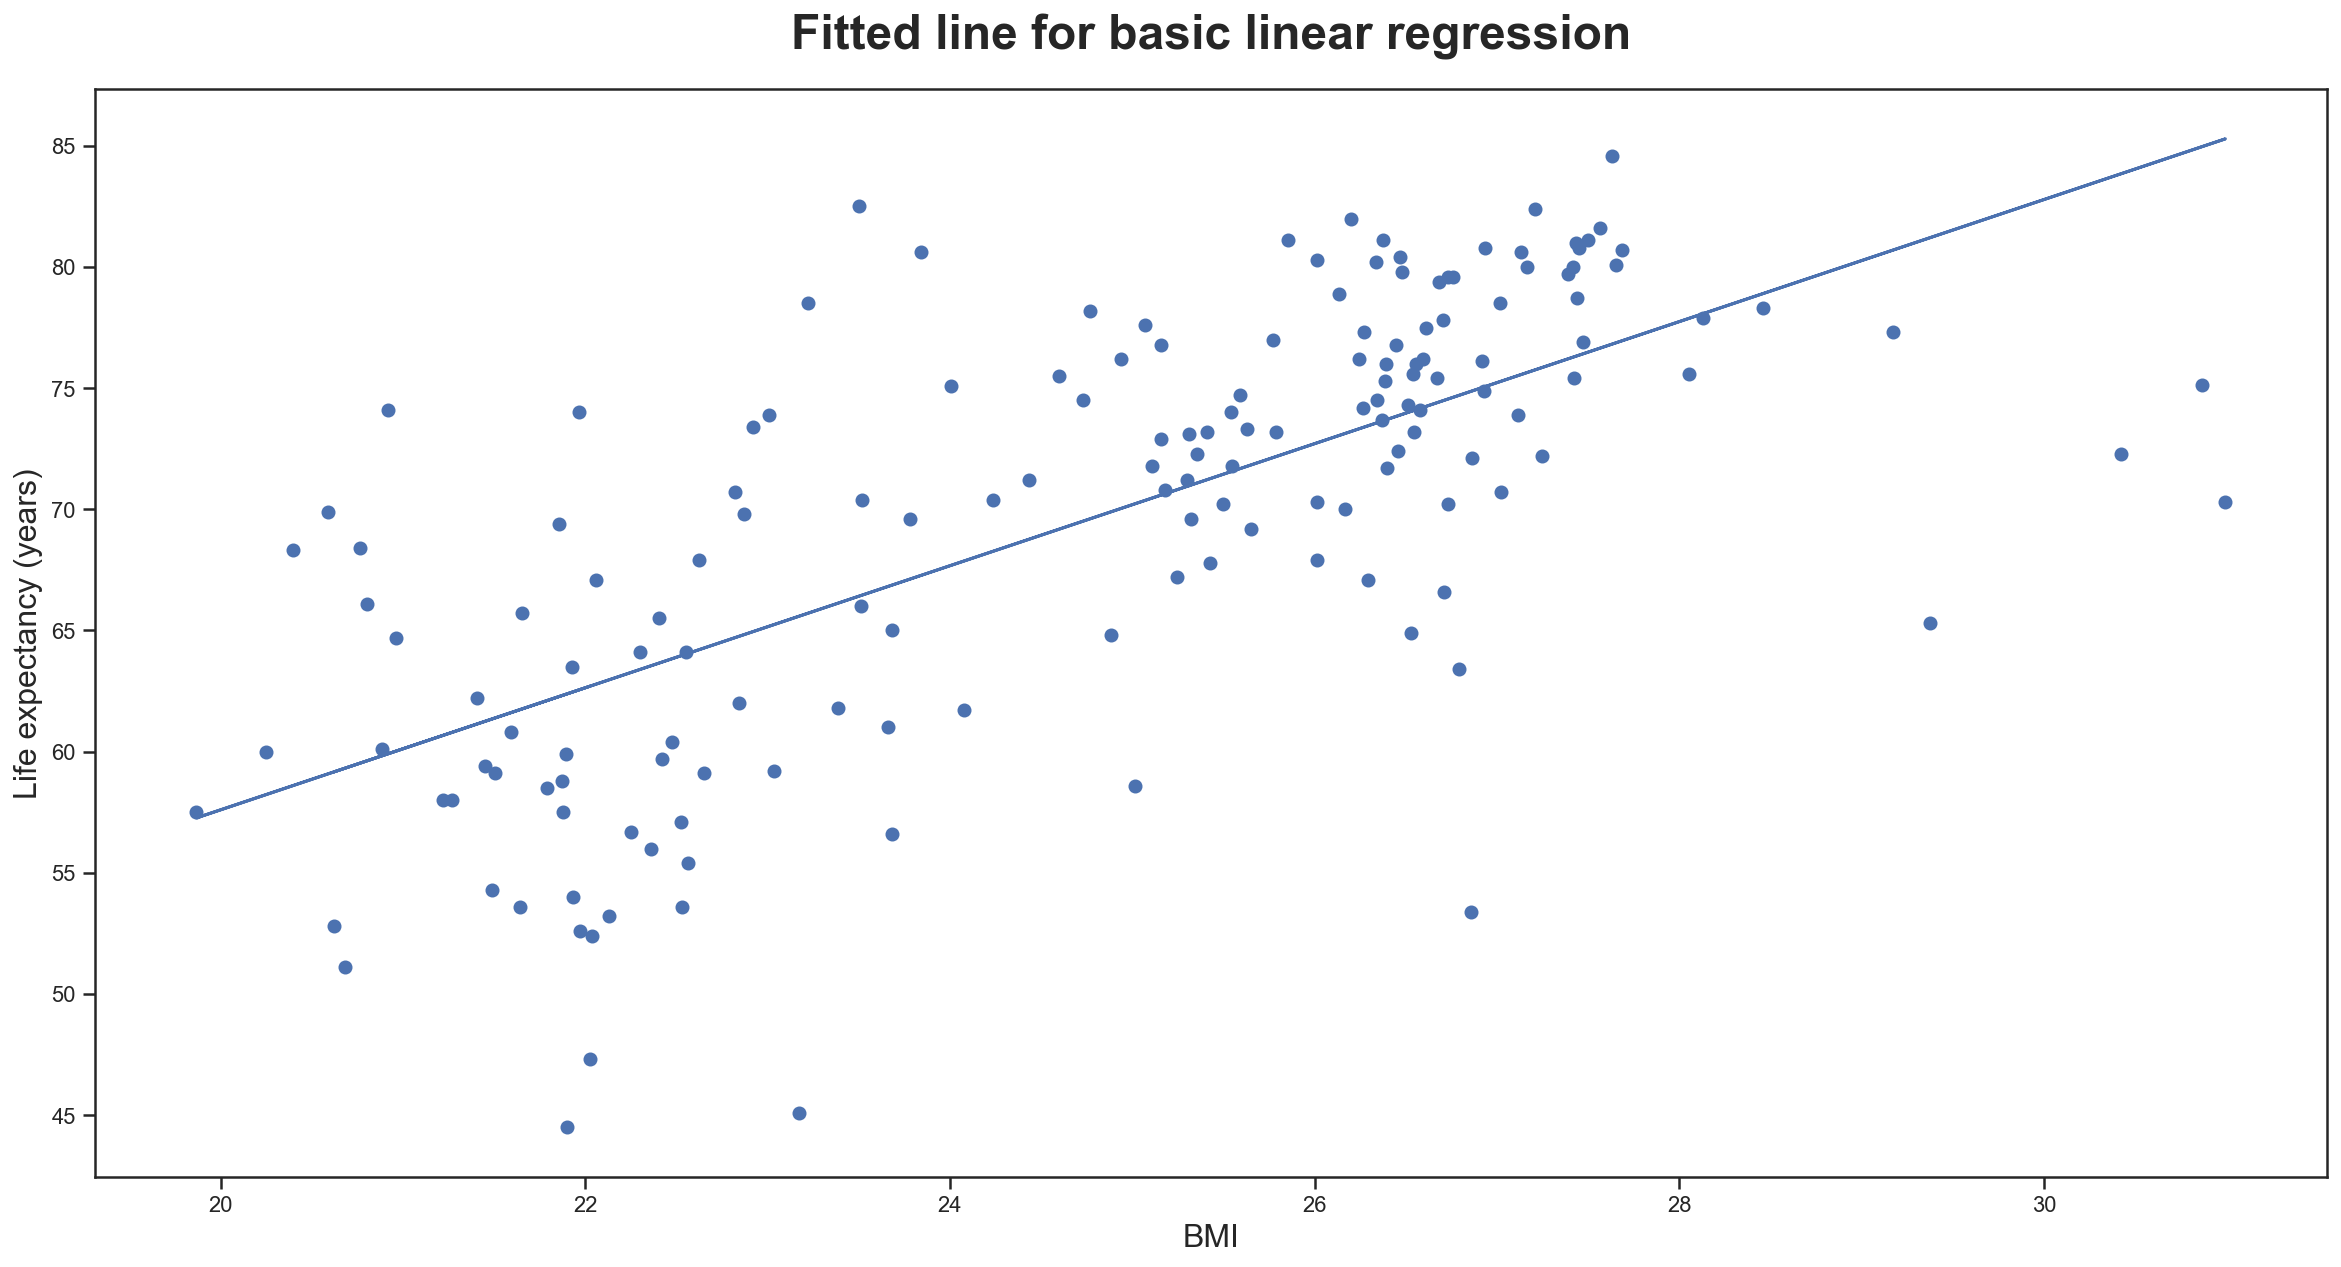

In [6]:
# Create plot and title
plt.figure(figsize=(20,10))
plt.title('Fitted line for basic linear regression', fontsize=24, fontweight='bold', pad=20)

# Set x and y labels
plt.xlabel('BMI', fontsize=16)
plt.ylabel('Life expectancy (years)', fontsize=16)

# Render scatter plot for data points
plt.scatter(X,y)

# Render line plot for fitted regression line
plt.plot(X, model.predict(X));

```{note}
This example is illustrative only. In reality the relationship between BMI and life expectancy is very unlikely to be linear, as life expectancy will not keep increasing as BMI keeps increasing.
```

### Multiple Linear Regression

Linear Regression can also be used with more than one independent variable. In fact, as long as relevant variables (or features) are selected to be evaluated as part of the regression, this can really help to get a better prediction.

Visualizing multiple regression in a graph is more difficult though. Having two independent variables to predict a dependent variable could still be plotted in a 3-dimensional coordinate system, but this is already harder to interpret. Having more than two independent variables, can no longer be graphed.

The general rules and methods of linear regression remain the same though, irrespective of the number of independent variables used.

The formula generalized for multiple linear regression, irrespective of the number of independent variables, would be as follows:

$\color{#c44e52}{y} = \color{#8172b3}{m_1}\color{#64b5cd}{x_1} + \color{#8172b3}{m_2}\color{#64b5cd}{x_2} + \color{#8172b3}{m_3}\color{#64b5cd}{x_3} + ... + \color{#8172b3}{m_n}\color{#64b5cd}{x_n} + \color{#da8bc3}{b}$
- $\color{#64b5cd}{x_i}$ are the independent variables (predictor)
- $\color{#c44e52}{y}$ is the dependent variable
- $\color{#8172b3}{m_i}$ are the coefficients for the respective $x_i$ variables
- $\color{#da8bc3}{b}$ is the intercept (e.g. the $y$ offset at $x=0$ of the line being fitted)

#### Python Code Example

In [7]:
# Imports and data import
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

# Load house pricing data, included in sklearn
boston_data = load_boston()

# Assign independent and dependent variables
X = boston_data['data']
y = boston_data['target']

# Create and fit the model
model = LinearRegression()
model.fit(X, y);

# Create a sample house with values for all 13 features for a house, in X
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]

# Predict price of the sample house
print(model.predict(sample_house))

[23.68284712]


### Polynomial Regression

Polynomial regression is a form of regression for which the relationship between the independent variable x and the dependent variable y is modeled as an $n$th degree polynomial of $x$. To achieve this feature $x$ is preprocessed to add additional features based on degrees of $x$. If we for example choose to add polynomial features for $x$ to till the third degree, this will result in $\color{#8172b3}{w_1}\color{#64b5cd}{x^3} + \color{#8172b3}{w_2}\color{#64b5cd}{x^2} + \color{#8172b3}{w_3}\color{#64b5cd}{x} + \color{#8172b3}{w}_4$, which will give us more weights to solve.

In the below example we can see that for the points in this data set, just evaluating the relation between $x$ and $y$ as a linear relation, doesn't give a good fit. As we start increasing the degree of the the polynomial features to be added, the model is able make a better fit. The optimal model seems to be at a degree of $4$, as a degree of $5$ is starting to introduce an additional 'valley' in the line around an $x$ value of $-2.5$, which is not fitting of the data points.

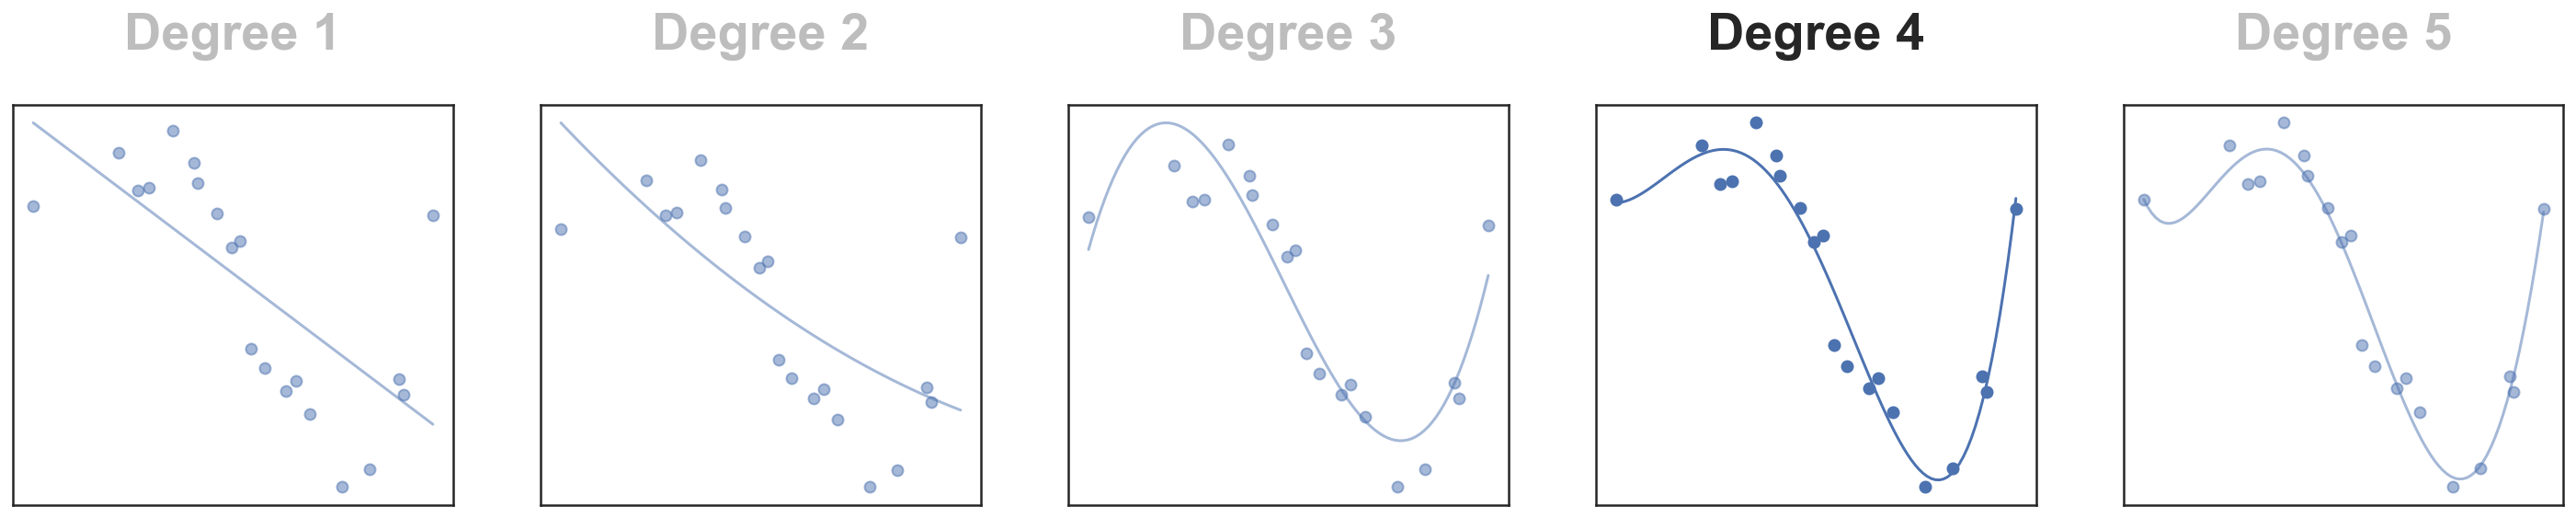

In [24]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load data
train_data = pd.read_csv('data/polynomial_regression_data.csv')

# Assign the data to predictor and outcome variables
X = train_data['Var_X'].values.reshape(-1,1)  # reshape to 1 column array of arrays, first -1 means fit whatever number of rows, to fit in 1 column (second parameter)
y = train_data['Var_Y'].values

plt.figure(figsize = [30, 4])

steps = 5
for step in range(1, steps+1):
    
    # Create polynomial features
    poly_feat = PolynomialFeatures(step)  # Here we vary the degree and see which degree leads to the best results - this was compared by predicting test data in the course form online
    X_poly = poly_feat.fit_transform(X)

    # Make and fit the polynomial regression model
    poly_model = LinearRegression(fit_intercept=False)  # Fit intercept can be turned to False as the the the Polynomial Features already contain a constant (e.g. 0 degree of variable)
    poly_model.fit(X_poly, y)
    
    ax = plt.subplot(1, steps+1, step)
    
    # Remove ticks
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

    # Generate 100 x-values between the min and the max value of x in the data set provided, to be able to render a smooth line
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1,1)  # reshape into array of arrays (matrix) with 1 column

    # Create poly features for all generated x values
    X_plot_poly = poly_feat.fit_transform(X_plot)

    # Use the already fitted model to predict the Y values for the generated x values
    if step == 4:
        ax.scatter(X, y)
        ax.plot(X_plot, poly_model.predict(X_plot_poly))
        ax.set_title('Degree {}'.format(step), fontweight='bold', fontsize=28, pad=30)
    else:
        ax.scatter(X, y, alpha=0.5)
        ax.plot(X_plot, poly_model.predict(X_plot_poly), alpha=0.5)
        ax.set_title('Degree {}'.format(step), fontweight='bold', fontsize=28, pad=30, alpha=0.3)
        
    ax.tick_params(axis='both', which='major', labelsize=20);

#### Python Code Example

In [9]:
# Imports and data import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load data
train_data = pd.read_csv('data/polynomial_regression_data.csv')
train_data.head()

,Var_X,Var_Y
0,-0.33532,6.66854
1,0.02160,3.86398
2,-1.19438,5.16161
3,-0.65046,8.43823
4,-0.28001,5.57201


In [10]:
# Assign independent and dependent variables
X = train_data['Var_X'].values.reshape(-1,1)  # reshape to -1 rows (e.g. any), 1 column
y = train_data['Var_Y'].values

# Create polynomial features
poly_feat = PolynomialFeatures(4)  # Degree of 4 worked best as per above example
X_poly = poly_feat.fit_transform(X)

# Create and fit the polynomial regression model
model = LinearRegression(fit_intercept=False)  # Polynomial Features already contain constant (0th degree)
model.fit(X_poly, y)

# Predict y for specific x value of 1.2 (adding poly features first)
x_predict = poly_feat.fit_transform([[1.2]])  # [[]] to enter parameter as array of arrays (matrix)
print(model.predict(x_predict))

[-6.16092964]


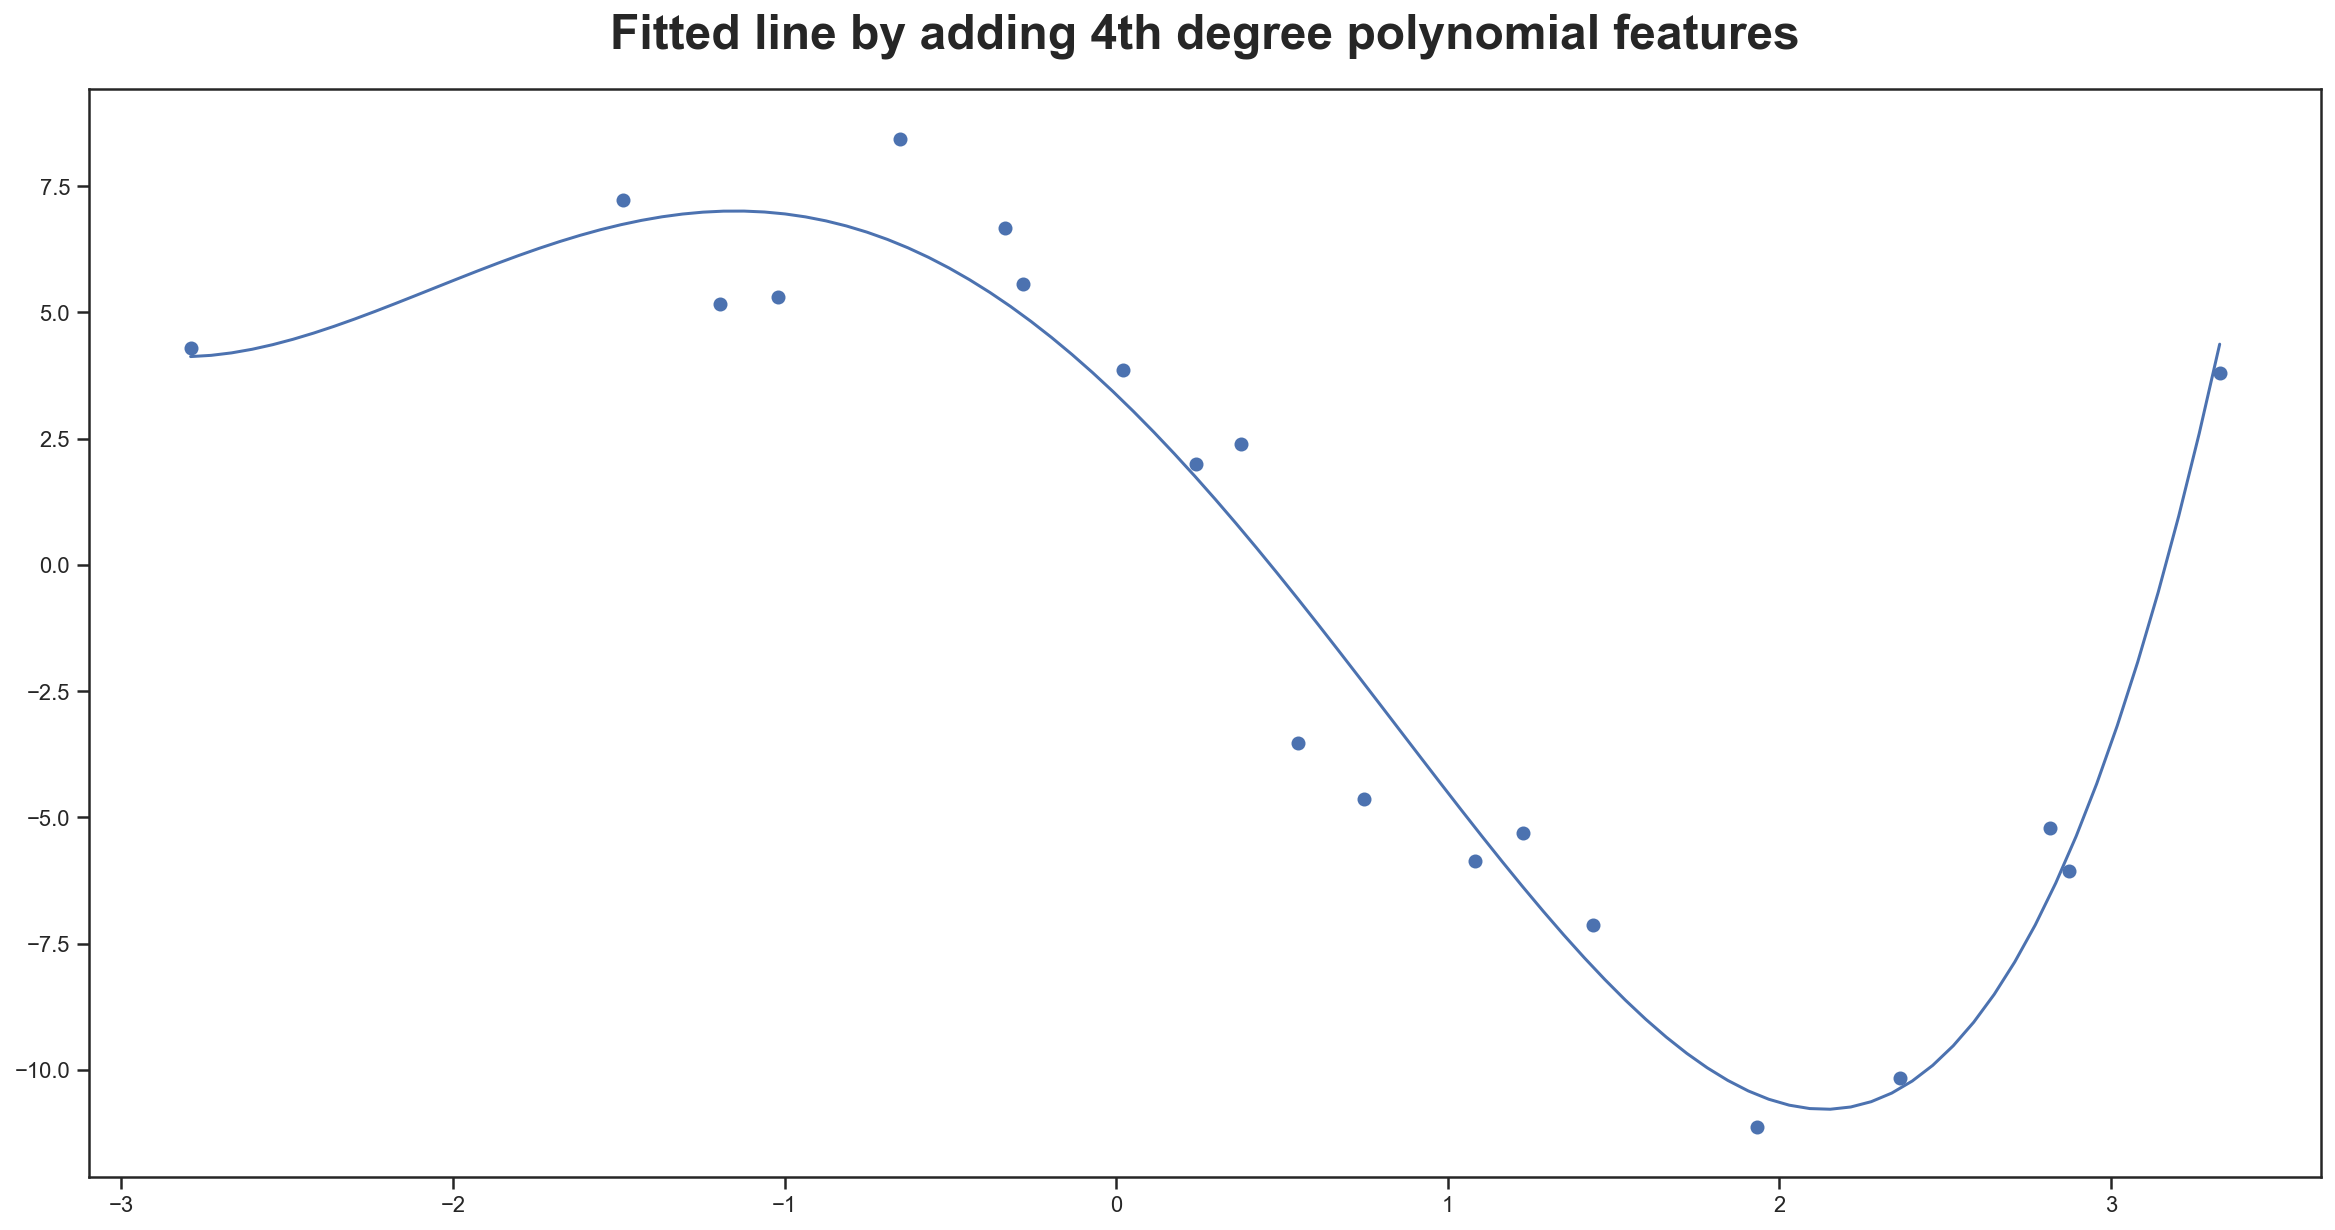

In [11]:
# Create plot and title
plt.figure(figsize=(20,10))
plt.title('Fitted line by adding 4th degree polynomial features', fontsize=24, fontweight='bold', pad=20)

# Render scatter plot for data points
plt.scatter(X,y)

# Generate 100 x-values between the min and the max value of x, to render a smooth line
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1,1)  # reshape to -1 rows (e.g. any), 1 column

# Create polynomial features for all generated x values
X_plot_poly = poly_feat.fit_transform(X_plot)

# Render line plot for fitted regression line
plt.plot(X_plot, model.predict(X_plot_poly));

## Error Functions

Linear Regression generally works by optimizing towards an Error Function. The error function is used to evaluate - for each data point - the difference between the actual value of the dependent variable for that data point and the predicted value. Linear regression aims to find the lowest error value for the combination of all these differences.

### Mean Absolute Error (MAE)

The Mean Absolute Error (MAE) is one of the most common error functions used in linear regression. An algorithm like Gradient Descent (discussed later) optimizes for the minimum error  returned by an error function.

The below visualization is a simplification, as usually we will deal with more than one feature and thus more dimensions. However, for illustrative purposes a 2-dimensional graph works best. The $\color{#dd8452}{\textbf{orange vertical lines}}$ represent the $y$ difference between the actual $y$ value for a point in the data set and the respective predicted $\hat{y}$ value. The mean of all absolute lengths of these $\color{#dd8452}{\textbf{orange lines}}$ is what we call the Mean Absolute Error.

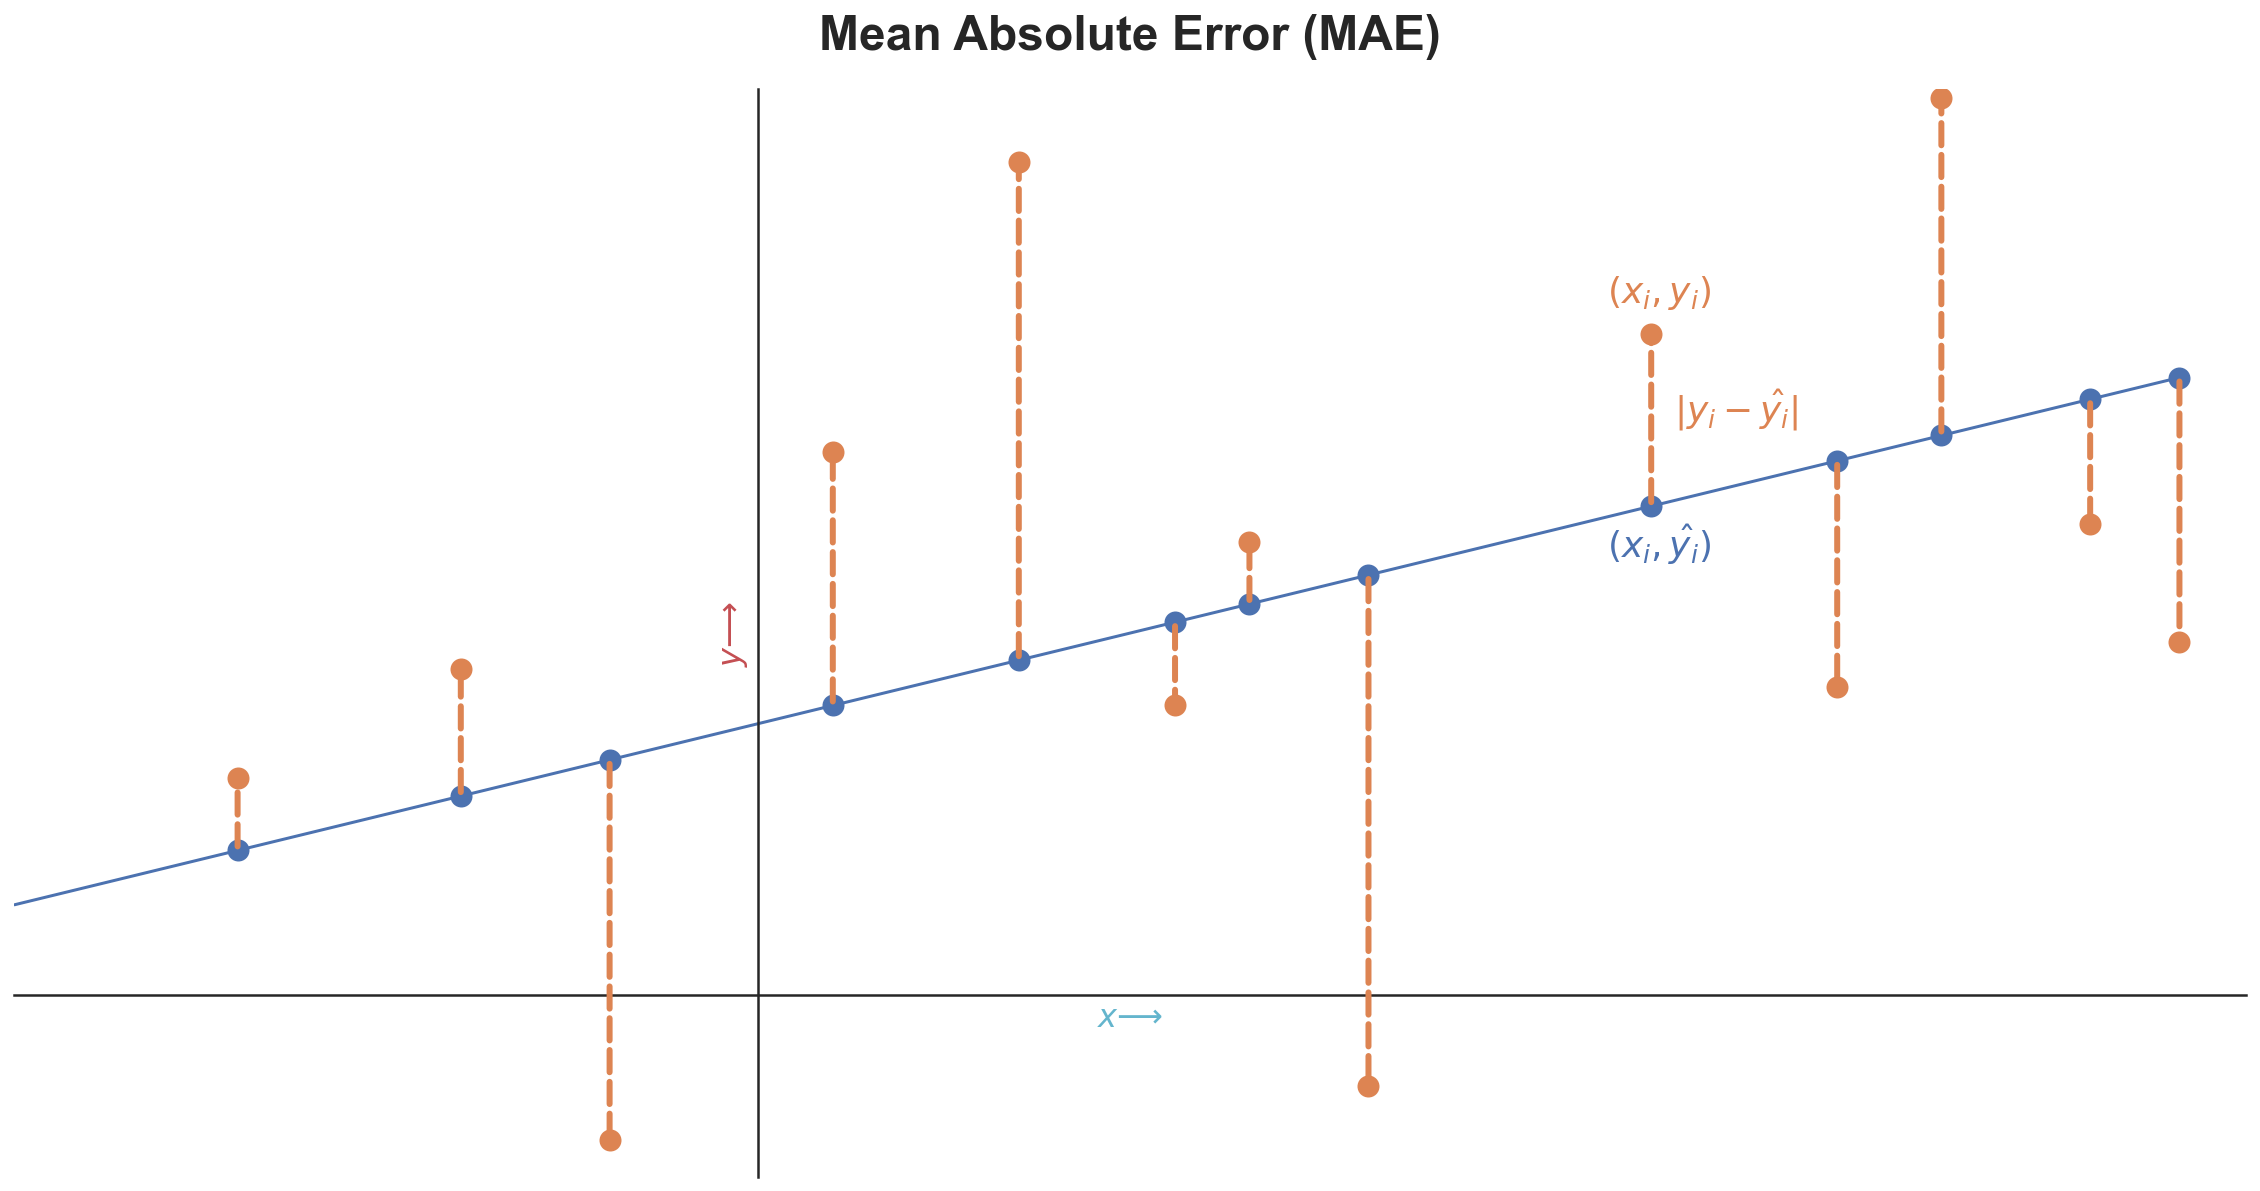

In [12]:
def draw_dot_with_error(x, y):
    plt.annotate('', xy=(x,y), xytext=(x,m*x+b), arrowprops=dict(arrowstyle='-', linestyle='--', color=color_orange, lw=3))
    ax.plot(x, y, 'o', color=color_orange, markersize='10')
    ax.plot(x, m*x+b, 'o', color=color_blue, markersize='10')

fig, ax = plt.subplots(figsize=(20,10))

m = 0.2  # slope
b = 3  # intercept

x = np.array(np.arange(-10,20))  
y = m * x + b

plt.plot(x, y)
plt.title('Mean Absolute Error (MAE)', fontsize=24, fontweight='bold', pad=20)

draw_dot_with_error(-7, 2.4)
draw_dot_with_error(-4, 3.6)
draw_dot_with_error(-2, -1.6)
draw_dot_with_error(1, 6)
draw_dot_with_error(3.5, 9.2)
draw_dot_with_error(5.6, 3.2)
draw_dot_with_error(6.6, 5)
draw_dot_with_error(8.2, -1)
draw_dot_with_error(12, 7.3)
draw_dot_with_error(14.5, 3.4)
draw_dot_with_error(15.9, 9.9)
draw_dot_with_error(17.9, 5.2)
draw_dot_with_error(19.1, 3.9)
                    
ax.text(11.4, 7.65, '$(x_i,y_i)$', fontsize=18, fontweight='bold', color=color_orange)
ax.text(11.4, 4.85, '$(x_i,\hat{y_i})$', fontsize=18, fontweight='bold', color=color_blue)
ax.text(12.3, 6.35, '$|y_i - \hat{y_i}|$', fontsize=18, fontweight='bold', color=color_orange)

# Set axes limits
ax.set_xlim(-10, 20)
ax.set_ylim(-2, 10)

# Remove ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Set x and y labels
ax.set_xlabel('$x ⟶$', color=color_aqua, fontsize=16)
ax.set_ylabel('$y ⟶$', color=color_red, fontsize=16)

# Set the x-spine
ax.spines['left'].set_position('zero')

# Turn off the right spine/ticks
ax.spines['right'].set_color('none')

# Set the y-spine
ax.spines['bottom'].set_position('zero')

# Turn off the top spine/ticks
ax.spines['top'].set_color('none');

The mathematical formula for the Mean Absolute Error can be denoted as:

$\text{MAE} = \frac{1}{n}\sum\limits_{i=1}^{n}|y_i-\hat{y_i}|$

``` {note}
We take the **absolute distances** for all the $y_i-\hat{y_i}$ calculations, to avoid positive and negative differences canceling each other out.
```

### Mean Squared Error (MSE)

The Mean Squared Error (MSE) is another very common error function used in linear regression and is also uses by algorithms like Gradient Descent (discussed later) to optimize for the minimum error returned.

The below visualization is again a simplification, as usually we will deal with more than one feature and thus more dimensions. However, for illustrative purposes a 2-dimensional graph works best. The $\color{#dd8452}{\textbf{orange vertical lines}}$ represent the $y$ difference between the actual $y$ value for a point in the data set and the respective predicted $\hat{y}$ value. The mean of all squared lengths of these $\color{#dd8452}{\textbf{orange lines}}$ is what we call the Mean Squared Error. This is represented by the $\color{#dd8452}{\textbf{orange box}}$ for one of the data points, but similar squares could be drawn for all data points.

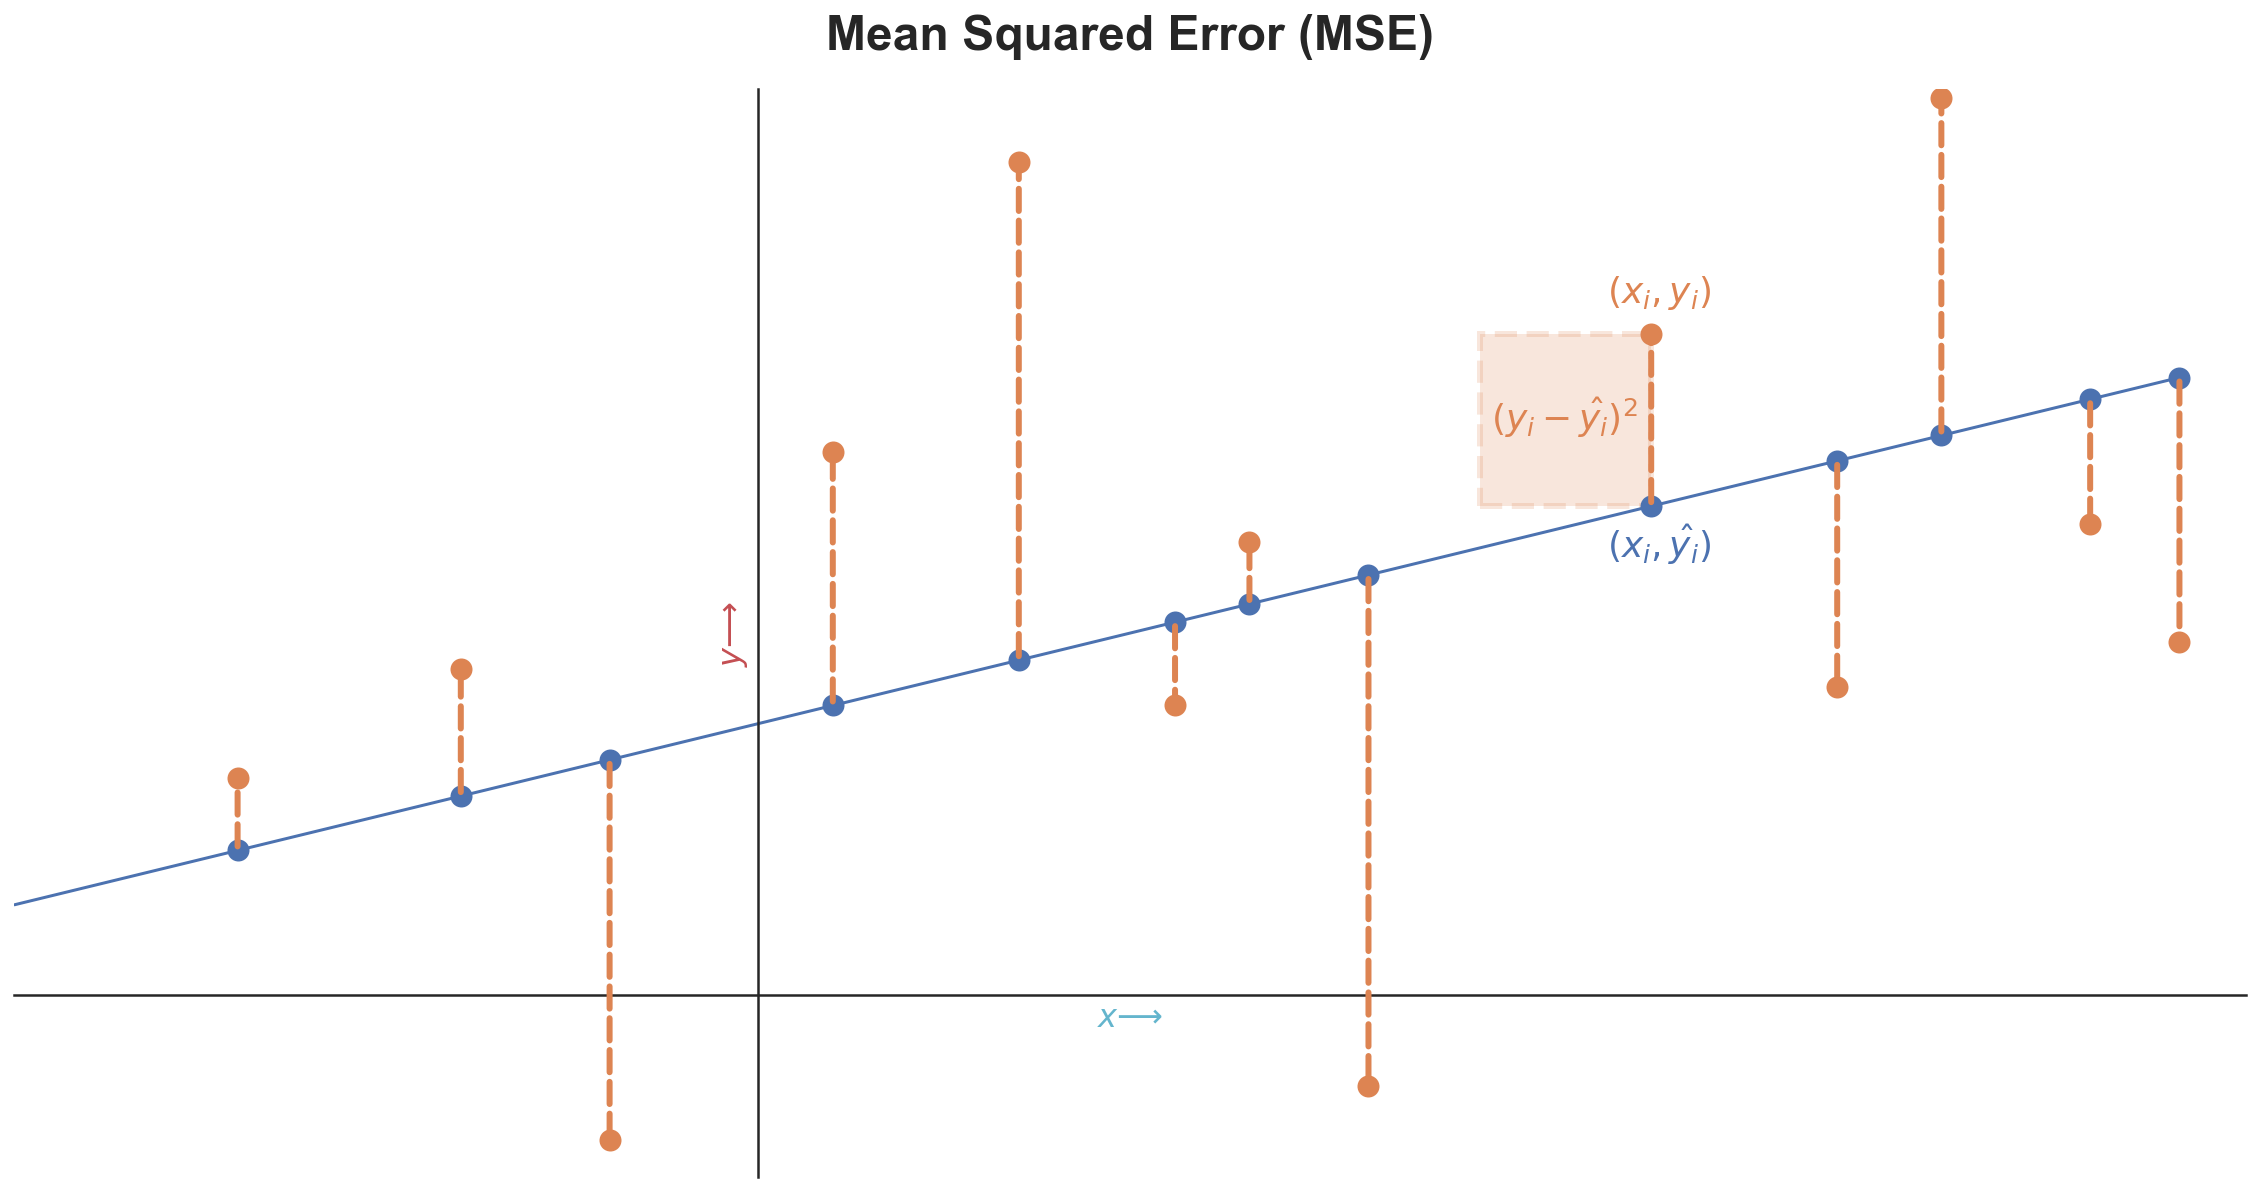

In [13]:
def draw_dot_with_error(x, y):
    plt.annotate('', xy=(x,y), xytext=(x,m*x+b), arrowprops=dict(arrowstyle='-', linestyle='--', color=color_orange, lw=3))
    ax.plot(x, y, 'o', color=color_orange, markersize='10')
    ax.plot(x, m*x+b, 'o', color=color_blue, markersize='10')

fig, ax = plt.subplots(figsize=(20,10))

m = 0.2  # slope
b = 3  # intercept

x = np.array(np.arange(-10,20))  
y = m * x + b

plt.plot(x, y)
plt.title('Mean Squared Error (MSE)', fontsize=24, fontweight='bold', pad=20)

draw_dot_with_error(-7, 2.4)
draw_dot_with_error(-4, 3.6)
draw_dot_with_error(-2, -1.6)
draw_dot_with_error(1, 6)
draw_dot_with_error(3.5, 9.2)
draw_dot_with_error(5.6, 3.2)
draw_dot_with_error(6.6, 5)
draw_dot_with_error(8.2, -1)
draw_dot_with_error(12, 7.3)
draw_dot_with_error(14.5, 3.4)
draw_dot_with_error(15.9, 9.9)
draw_dot_with_error(17.9, 5.2)
draw_dot_with_error(19.1, 3.9)
                    
ax.text(11.4, 7.65, '$(x_i,y_i)$', fontsize=18, fontweight='bold', color=color_orange)
ax.text(11.4, 4.85, '$(x_i,\hat{y_i})$', fontsize=18, fontweight='bold', color=color_blue)
ax.text(9.85, 6.25, '$(y_i - \hat{y_i})^2$', fontsize=18, fontweight='bold', color=color_orange)

# Set axes limits
ax.set_xlim(-10, 20)
ax.set_ylim(-2, 10)

# Remove ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Set x and y labels
ax.set_xlabel('$x ⟶$', color=color_aqua, fontsize=16)
ax.set_ylabel('$y ⟶$', color=color_red, fontsize=16)

# Set the x-spine
ax.spines['left'].set_position('zero')

# Turn off the right spine/ticks
ax.spines['right'].set_color('none')

# Set the y-spine
ax.spines['bottom'].set_position('zero')

# Turn off the top spine/ticks
ax.spines['top'].set_color('none');

# Create a Rectangle patch
rect = patches.Rectangle((9.7, 5.40), 2.3, 1.90, linewidth=3, linestyle='--', edgecolor=color_orange, facecolor=color_orange, alpha=0.2)

# Add the patch to the Axes
ax.add_patch(rect);

The mathematical formula for the Mean Absolute Error can be denoted as:

$\text{MSE} = \frac{1}{n}\sum\limits_{i=1}^{n}(y_i-\hat{y_i})^2$

``` {note}
We do not need to take the **absolute distances** for all the $y_i-\hat{y_i}$ calculations in this case, as we get this for free by squaring.
```

## Algorithms and Optimizations

There are many algorithms and optimizations which can be performed on the model and/or the data with an aim to get the line which best fits the training data on which the model was trained, but also is general enough to have the best possible prediction power on new data. Other considerations include complexity of the model and interpretability of the model.

```{warning}
**Avoid over-fitting:** One pitfall which should be avoided is over-fitting a model, where the model super accurately describes the training data, but because it is extremely tightly fit on exactly that data, it will be bad at predicting any new data.
```

### Gradient Descent

Gradient Descent is an algorithm which uses the aforementioned error functions to adjust weights for the fitted model to reduce the error to a minimum. It does so by taking the following steps:
- First it draws a random line and calculates the error for that line (e.g. how far are the points from this line)
- Then it keeps adjusting the line, checking for the error and proceeding in the direction where the error decreases
- The way to decrease (or descend) the error function, is to first take the derivative (or gradient) of the error function with respect to the weights
- This gradient will point towards the direction where the function increases the most, so the negative of this function will point in the direction were the function decreases the most
- We take a step in the direction of this negative gradient (see mathematical notation below)
- This step is actually multiplied by the learning rate $\alpha$ to ensure we take small steps
- By doing so the error function is decreasing and we are getting closer to a minimum
- If we continue this we get to a minimum (or pretty close)

The mathematical formula for applying Gradient Decent to update the weights ($w_i$) can be denoted as:

$w_i \rightarrow w_i - \alpha\frac{\partial}{\partial w_i}Error$


```{admonition} TODO
:class: tip
Add formulas for applying MAE and MSE as error function in gradient descent
```

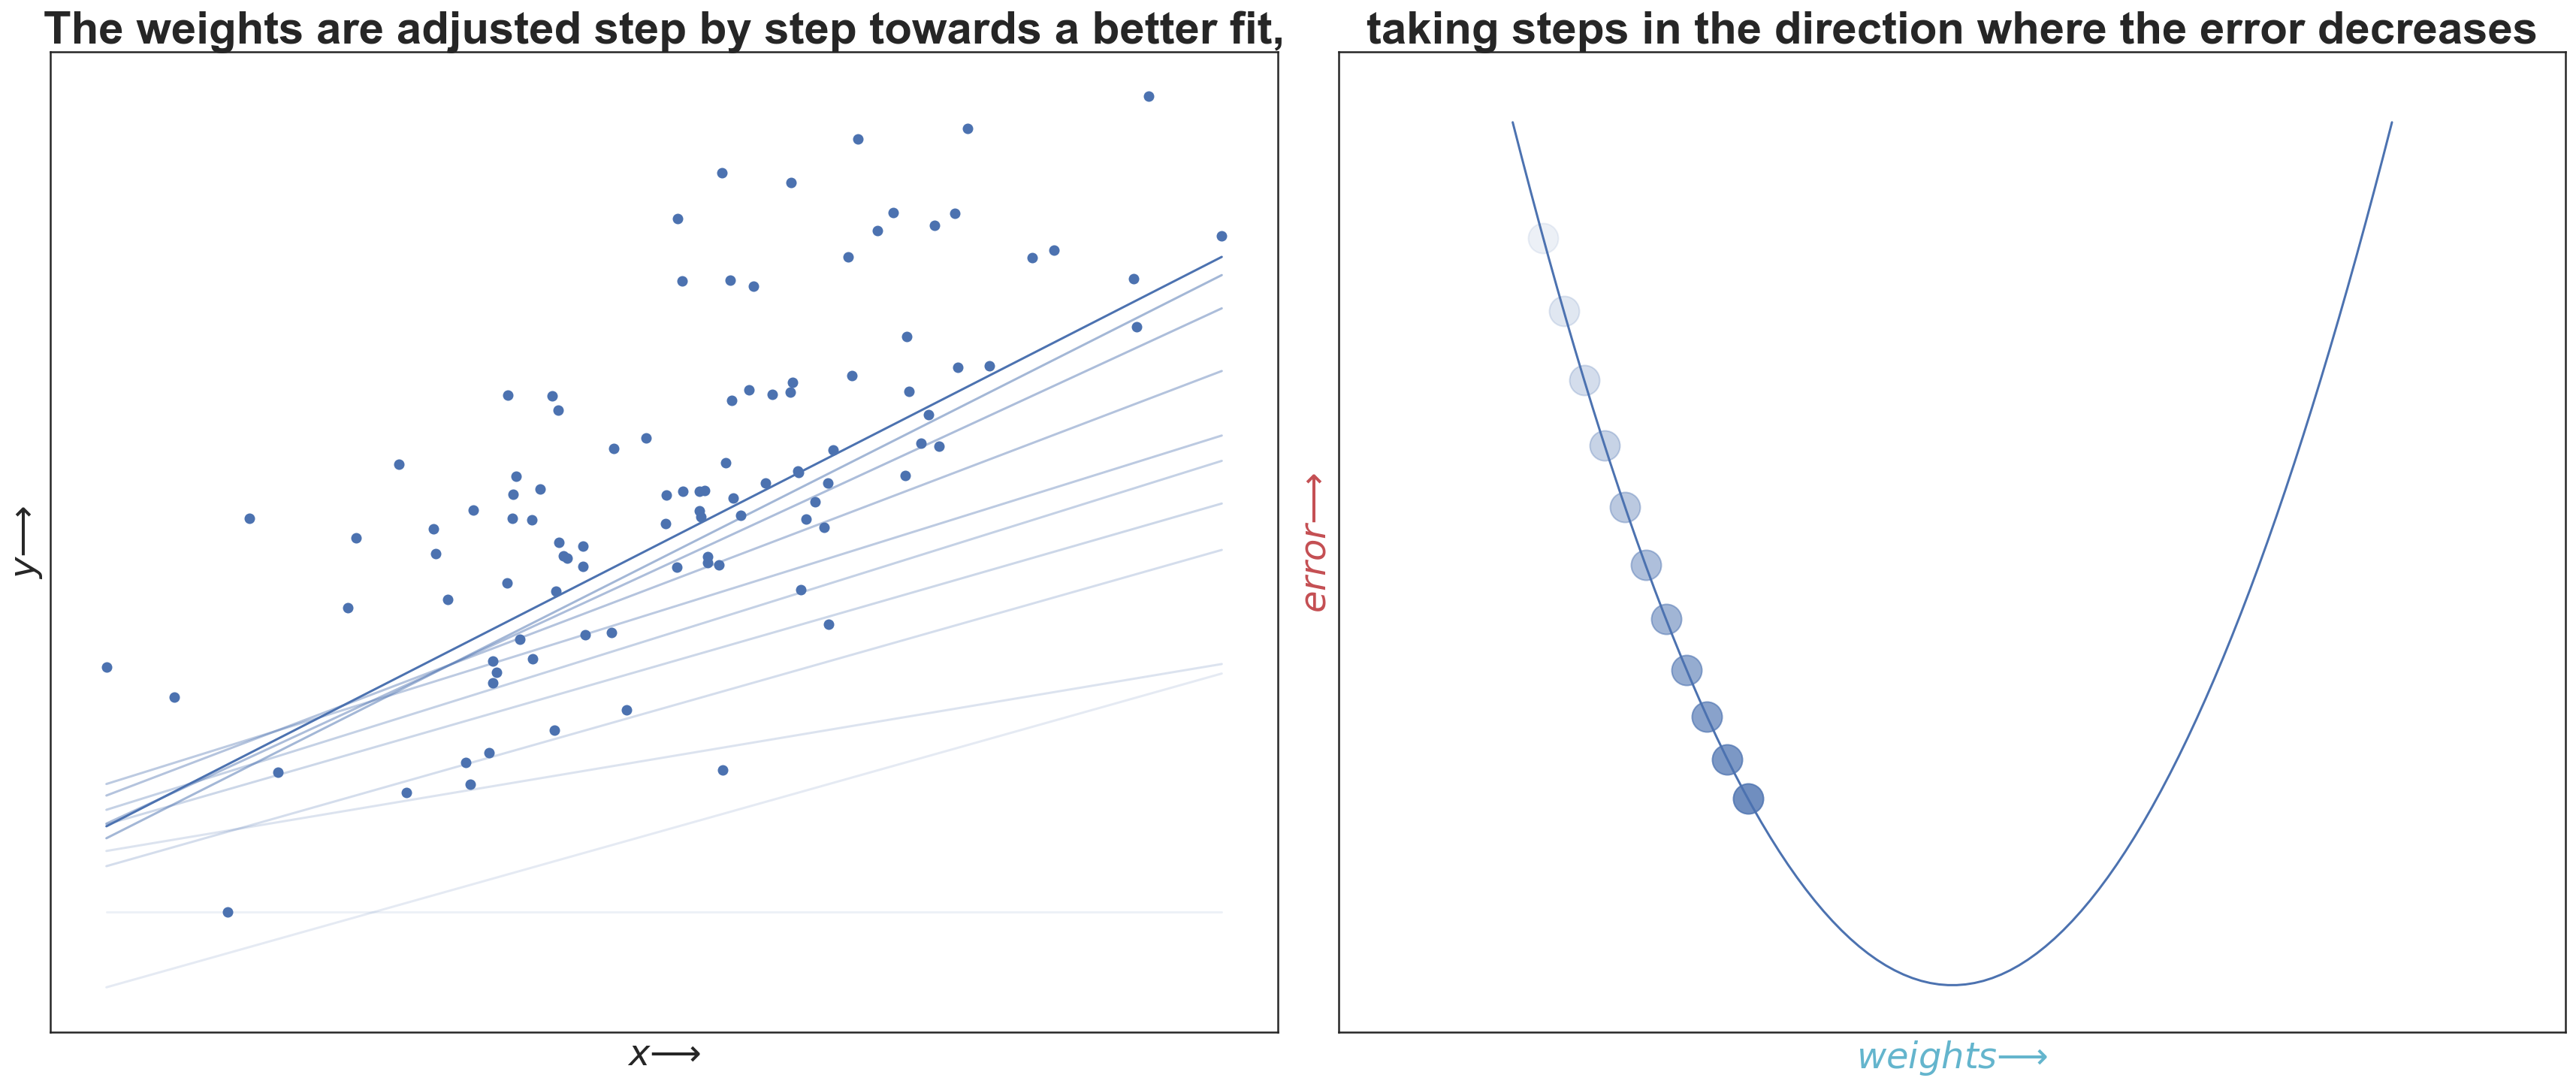

In [38]:
# Setting a random seed
np.random.seed(42)


def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # Compute the errors
    y_pred = np.matmul(X, W) + b
    errors = y - y_pred
    
    # Compute steps
    W_new = W + learn_rate * np.matmul(errors, X)
    b_new = b + learn_rate * errors.sum()  # JOEP: probably doing sum here as, matmul would already sum up (CHECK) and we want to do the same for all points (e.g. sum up errors of all points)
    
    return W_new, b_new


def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.01, num_iter = 10):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


# Helper function for plotting dots on the error function line
def plot_dot(x, alpha):
    ax.plot(x, x ** 2, 'o', markersize='20', color=color_blue, alpha=alpha)


# Perform gradient descent
data = np.loadtxt('data/mini_batch_gd_data.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]
regression_coef = miniBatchGD(X, y)

# Draw plot, which will have two subplots side by side and reduce the spacing between the subplots
plt.figure(figsize = [30, 12])
plt.subplots_adjust(wspace = 0.05)

# Draw left subplot
ax = plt.subplot(1, 2, 1)
ax.set_title('The weights are adjusted step by step towards a better fit,', fontsize=30, fontweight='bold')

# Set x and y labels
ax.set_xlabel('$x ⟶$', fontsize=24)
ax.set_ylabel('$y ⟶$', fontsize=24)

# Remove ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Draw plot showing the line adjusting towards a better fit
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    alpha = 0.6 - 0.5/len(regression_coef) * counter
    counter -= 1
    if counter == 0: 
        alpha = 1
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = sb.color_palette(palette='deep')[0], alpha=alpha)

# Draw scatter plot of data points against which the line is being fitted
plt.scatter(X, y)

# Draw right subplot
ax = plt.subplot(1, 2, 2)
ax.set_title('taking steps in the direction where the error decreases', fontsize=30, fontweight='bold')

# Set axes limits
ax.set_xlim(-6, 6)
ax.set_ylim(-1, 20)

# Set x and y labels
ax.set_xlabel('$weights ⟶$', color=color_aqua, fontsize=24)
ax.set_ylabel('$error ⟶$', color=color_red, fontsize=24)

# Remove ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Create 100 x values to use for plot to ensure a smooth line
X_plot = np.linspace(-4.3, 4.3, 100).reshape(-1,1)
plt.plot(X_plot, X_plot ** 2)

# Create dots on the error function line to show the error is decreasing as the line ges a better fit
for i in range(0, 11):
    plot_dot(i*0.2-4, 0.1 + i*0.07)

```{admonition} TODO
:class: tip
Add Note for mini batch gradient descent
```

### Regulation

### Feature Scaling

#### Common Methods

##### Standardizing

##### Normalizing

#### Use Cases